In [1]:
import numpy as np
from scipy.integrate import odeint

In [2]:
def lorenz_deriv(state, t, sigma=10.0, rho=28.0, beta=8.0/3.0):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

def generate_lorenz_data(
    initial_state=[1.0, 1.0, 1.0],
    tmax=25.0,
    dt=0.01,
    sigma=10.0,
    rho=28.0,
    beta=8.0/3.0
):
    
    num_steps = int(tmax / dt)
    t_vals = np.linspace(0, tmax, num_steps+1)
    sol = odeint(lorenz_deriv, initial_state, t_vals, args=(sigma, rho, beta))
    return t_vals, sol

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
# 1) Generate Lorenz data
tmax = 110
dt   = 0.01
t_vals, lorenz_traj = generate_lorenz_data(
    initial_state=[1.0,1.0,1.0],
    tmax=tmax,
    dt=dt
)

washout = 1000
t_vals = t_vals[washout:]
lorenz_traj = lorenz_traj[washout:]

# normalize
scaler = StandardScaler()
scaler.fit(lorenz_traj)
lorenz_traj = scaler.transform(lorenz_traj)

T_data = len(lorenz_traj)
print(f"Data length: {T_data}, from t=0..{tmax} with dt={dt}.")

n_test_steps = 101

# train/test split
train_frac = 0.7
train_end = int(train_frac*(T_data-1))
train_input  = lorenz_traj[:train_end]
train_target = lorenz_traj[1:train_end+1]
test_input   = lorenz_traj[train_end:train_end+n_test_steps]
test_target  = lorenz_traj[train_end+1:train_end+n_test_steps+1]
print(f"Train size: {len(train_input)}  Test size: {len(test_input)}")

initial_in = test_input[0]

Data length: 10001, from t=0..110 with dt=0.01.
Train size: 7000  Test size: 101


In [5]:
t_vals = t_vals[train_end:train_end+n_test_steps]

In [6]:
t_vals

array([80.  , 80.01, 80.02, 80.03, 80.04, 80.05, 80.06, 80.07, 80.08,
       80.09, 80.1 , 80.11, 80.12, 80.13, 80.14, 80.15, 80.16, 80.17,
       80.18, 80.19, 80.2 , 80.21, 80.22, 80.23, 80.24, 80.25, 80.26,
       80.27, 80.28, 80.29, 80.3 , 80.31, 80.32, 80.33, 80.34, 80.35,
       80.36, 80.37, 80.38, 80.39, 80.4 , 80.41, 80.42, 80.43, 80.44,
       80.45, 80.46, 80.47, 80.48, 80.49, 80.5 , 80.51, 80.52, 80.53,
       80.54, 80.55, 80.56, 80.57, 80.58, 80.59, 80.6 , 80.61, 80.62,
       80.63, 80.64, 80.65, 80.66, 80.67, 80.68, 80.69, 80.7 , 80.71,
       80.72, 80.73, 80.74, 80.75, 80.76, 80.77, 80.78, 80.79, 80.8 ,
       80.81, 80.82, 80.83, 80.84, 80.85, 80.86, 80.87, 80.88, 80.89,
       80.9 , 80.91, 80.92, 80.93, 80.94, 80.95, 80.96, 80.97, 80.98,
       80.99, 81.  ])

In [7]:
import json
import pandas as pd

# Load the JSON file
with open("grid_search_results_sparse.json", "r") as f:
    data = json.load(f)

# Extract relevant data
records = []
for entry in data:
    row = entry["params"].copy()  # get all params
    row["mean_T_VPT"] = entry["mean_T_VPT"]
    row["std_dev"] = entry["std_dev"]
    records.append(row)

# Create DataFrame and save to CSV
df = pd.DataFrame(records)
df.to_csv("extracted_results_sparse.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'grid_search_results_sparse.json'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.preprocessing import StandardScaler

Data length: 10501, from t=0..250 with dt=0.02.
Train size: 8400  Test size: 2100


C:\Users\shrey\AppData\Local\Temp\ipykernel_12908\3590378839.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


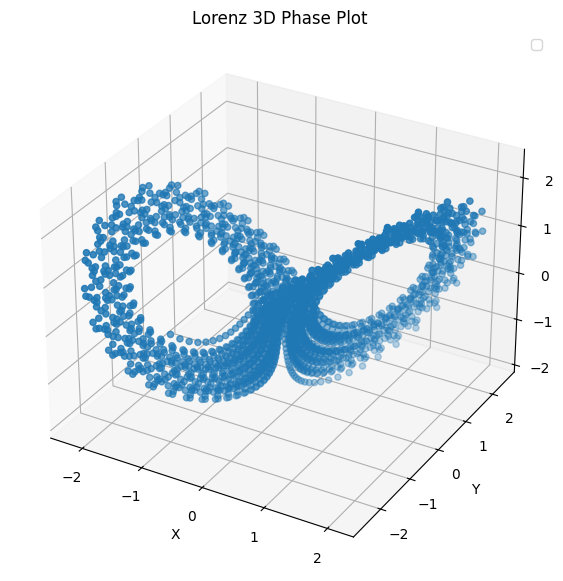

In [15]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def lorenz_deriv(state, t, sigma=10.0, rho=28.0, beta=8.0/3.0):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

def generate_lorenz_data(
    initial_state=[1.0, 1.0, 1.0],
    tmax=25.0,
    dt=0.01,
    sigma=10.0,
    rho=28.0,
    beta=8.0/3.0
):
    num_steps = int(tmax / dt) + 1 # +1 to include t=0
    t_vals = np.linspace(0, tmax, num_steps)
    sol = odeint(lorenz_deriv, initial_state, t_vals, args=(sigma, rho, beta))
    return t_vals, sol
# 1) Generate Lorenz data
tmax = 250
dt   = 0.02
t_vals, lorenz_traj = generate_lorenz_data(
    initial_state=[1.0,1.0,1.0],
    tmax=tmax,
    dt=dt
)

washout = 2000
t_vals = t_vals[washout:]
lorenz_traj = lorenz_traj[washout:]

# normalize
scaler = StandardScaler()
scaler.fit(lorenz_traj)
lorenz_traj = scaler.transform(lorenz_traj)

T_data = len(lorenz_traj)
print(f"Data length: {T_data}, from t=0..{tmax} with dt={dt}.")

n_test_steps = 2100

# train/test split
train_frac = 0.8
train_end = int(train_frac*(T_data-1))
train_input  = lorenz_traj[:train_end]
train_target = lorenz_traj[1:train_end+1]
test_input   = lorenz_traj[train_end:train_end+n_test_steps]
test_target  = lorenz_traj[train_end+1:train_end+n_test_steps+1]
print(f"Train size: {len(train_input)}  Test size: {len(test_input)}")

initial_in = test_input[0]
# 4) partial trajectory
plot_len = min(500, n_test_steps)
time_test = np.linspace(train_end*dt, (train_end+plot_len)*dt, plot_len)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(test_target[:,0], test_target[:,1], test_target[:,2])
ax.set_title('Lorenz 3D Phase Plot')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


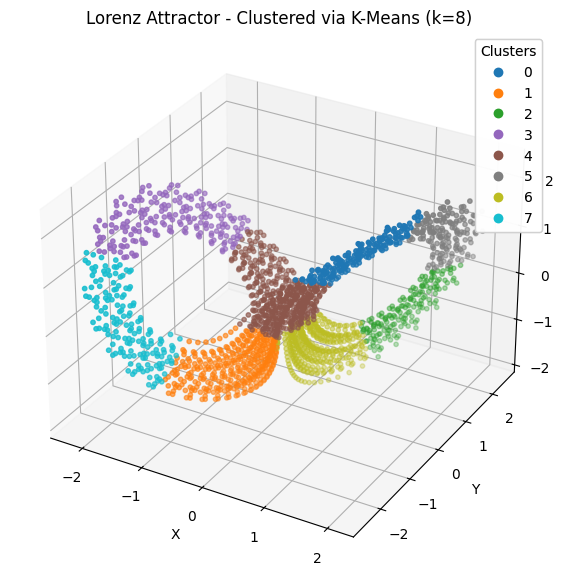

In [16]:
# Step 1: Apply KMeans
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(test_target)

# Step 2: Plot the clustered Lorenz attractor
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    test_target[:, 0],
    test_target[:, 1],
    test_target[:, 2],
    c=cluster_labels,
    cmap='tab10',
    s=10
)

ax.set_title("Lorenz Attractor - Clustered via K-Means (k={})".format(k))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
ax.add_artist(legend1)

plt.show()